# Programmbeispiel: Finite Differenzen (1D)

In diesem Beispiel lösen wir das Problem
$$
-u''(x) = f(x), x \in (a,b)
$$
mit Randwerten $u(a) = u_a, u(b) = u_b$. 


Damit wir konkret arbeiten können, wählen wir das Einheitsintervall $a=0, b=1$ und betrachten die rechte Seite $f(x) = \pi^2 \sin \pi x$. Hierfür ergibt sich die Lösung 
$$ u(x) = \sin \pi x
$$

In [1]:
%plot -f svg

In [2]:
xa = 0.0
xb = 1.0

ua= 0.0
ub= 0.0

NumCells = 8
NumPoints = NumCells +1

# Gitterweite
h = (xb-xa)/NumCells

# Koordinaten
x = linspace(xa, xb, NumPoints)

xa = 0
xb = 1
ua = 0
ub = 0
NumCells = 8
NumPoints = 9
h = 0.1250
x =

 Columns 1 through 8:

        0   0.1250   0.2500   0.3750   0.5000   0.6250   0.7500   0.8750

 Column 9:

   1.0000



In [3]:
f=@(x) (pi*pi)*sin(pi*x)
mysolution = @(x) sin(pi*x)

f =

@(x) (pi * pi) * sin (pi * x)

mysolution =

@(x) sin (pi * x)



## a) Schritt für Schritt zum LGS
Zunächst initialisieren wir für **innere Knoten** die Matrix und rechte Seite mit
$$
(-u_{i-1} + 2 u_i - u_{i+1}) = h^2 f_i
$$

In [4]:

function A=init_matrix(NumPoints)
A=zeros(NumPoints,NumPoints);

for i=1:NumPoints

    if (i>1) A(i,i-1) = -1; end
    A(i,i) = 2;
    if (i<NumPoints) A(i,i+1) = -1; end
    
endfor

endfunction
A =init_matrix(NumPoints)
b = (h*h)*f(x')

A =

   2  -1   0   0   0   0   0   0   0
  -1   2  -1   0   0   0   0   0   0
   0  -1   2  -1   0   0   0   0   0
   0   0  -1   2  -1   0   0   0   0
   0   0   0  -1   2  -1   0   0   0
   0   0   0   0  -1   2  -1   0   0
   0   0   0   0   0  -1   2  -1   0
   0   0   0   0   0   0  -1   2  -1
   0   0   0   0   0   0   0  -1   2

b =

        0
   0.0590
   0.1090
   0.1425
   0.1542
   0.1425
   0.1090
   0.0590
   0.0000



An den Stellen, an denen **Dirichlet-Randwerte** vorliegen, wird in der Matrix eine Einheitszeile gesetzt und die rechte Seite angepasst:

In [5]:
function [A,b] = set_dirichlet(i, ui, A, b)
    b(i) = ui;
    A(i,:) = 0;
    A(i,i) = 1;
endfunction

[A,b] = set_dirichlet(1, ua, A, b);
[A,b] = set_dirichlet(NumPoints, ub, A, b)

A =

   1   0   0   0   0   0   0   0   0
  -1   2  -1   0   0   0   0   0   0
   0  -1   2  -1   0   0   0   0   0
   0   0  -1   2  -1   0   0   0   0
   0   0   0  -1   2  -1   0   0   0
   0   0   0   0  -1   2  -1   0   0
   0   0   0   0   0  -1   2  -1   0
   0   0   0   0   0   0  -1   2  -1
   0   0   0   0   0   0   0   0   1

b =

        0
   0.0590
   0.1090
   0.1425
   0.1542
   0.1425
   0.1090
   0.0590
        0



**Neumann-Randbedingungen** 
Gegeben sei die Neumann-Bedingung am linken Rand:
$$
\frac{\partial u}{\partial n} = - u'(x_0) = -g
$$


In der Gleichung
$$
\frac{u_0-2u_1 + u_2}{h^2} = f_1 $$
eliminiert man den (Ghost-)Wert $u_0$ mittels

$$
\frac{u_2-u_0}{2h} = -g \Leftrightarrow  u_0 = u_2 + 2gh
$$
und erhält 
$$\frac{u_2- u_1}{h} =  \frac{h}{2}f_1 - g $$
bzw.
$$ (u_2- u_1) =  \frac{h^2}{2}f_1 - g h $$
Aus Symmetriegründen gilt die Updateformel auch am rechten Rand, wobei das Vorzeichen des Normalenvektors zu beachten ist.

In [6]:
function [A,b] = add_neumann(i, ghi, A, b)
    A(i,i) += -1.0;
    b(i) *=0.5;
    b(i) += ghi;
endfunction

% [A,b] = add_neumann(1, -h*1.0, A, b);

Die numerische Lösung kann nun über ein lineares Gleichungssystem bestimmt werden:

In [7]:
u = linsolve(A,b);

Wir wollen numerische und analytische Lösung gegenüberstellen:

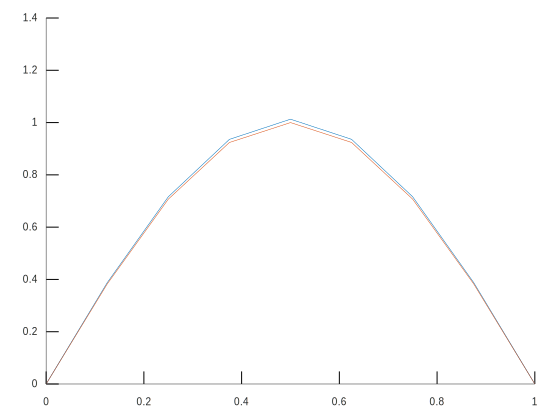

In [8]:
hold on
sol = mysolution(x);

plot(x, u)
plot(x, sol)

Den Fehler berechnen wir in den Punkten $x_i$:

In [9]:
einf=norm(u-sol', inf)

einf = 0.012951


## b) Studie zur Diskretisierungsgenauigkeit

In [10]:
function [h, herr]=discretization_error(f, NumPoints, xLeft, uLeft, xRight, uRight, uref )

    # Gitterweite
    h = (xRight - xLeft)/(NumPoints-1);
    # Koordinaten
    x = linspace(xLeft, xRight, NumPoints);
    
    # Aufstellen des LGS
    A = init_matrix(NumPoints);
    h
    b = f(x)(:);
    b *= (h*h);
    u = zeros(NumPoints,1);
    
    [A,b] = set_dirichlet(1, uLeft, A, b);
    [A,b] = set_dirichlet(NumPoints, uRight, A, b);
    
    u = linsolve(A,b);
    
    sol = uref(x)(:);
    err = u -sol;
    herr=norm(err, inf);
   
  # hold on
  #  plot(x, u)
  #  plot(x, sol)
    
endfunction


In [11]:
for k=1:8
    [hGrid(k), hErr(k)] = discretization_error(f, 2**k+1, xa, ua, xb, ub, mysolution);
endfor 

hGrid(:)
hErr(:)

h = 0.5000
h = 0.2500
h = 0.1250
h = 0.062500
h = 0.031250
h = 0.015625
h = 7.8125e-03
h = 3.9062e-03
ans =

   5.0000e-01
   2.5000e-01
   1.2500e-01
   6.2500e-02
   3.1250e-02
   1.5625e-02
   7.8125e-03
   3.9062e-03

ans =

   2.3370e-01
   5.3029e-02
   1.2951e-02
   3.2190e-03
   8.0358e-04
   2.0082e-04
   5.0201e-05
   1.2550e-05



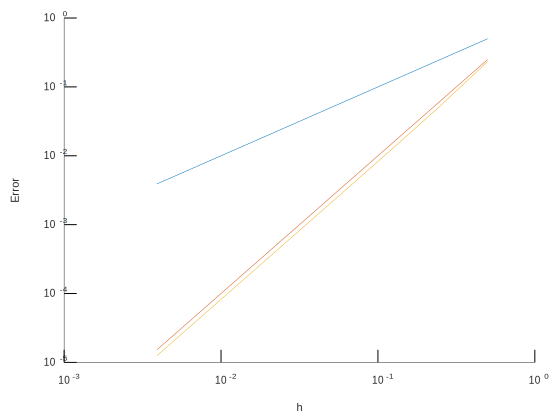

In [12]:
hold on
loglog(hGrid,hGrid)
loglog(hGrid,hGrid.*hGrid) # Model
loglog(hGrid,hErr)             # Data

xlabel("h")
ylabel("Error")
hold off